In [2]:
import parmap
import TO_sim.parmap_use as PU
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import TO_sim.analytical.order_sec_parameter as OSP

In [9]:
N = 3000
K = 5

A = np.load(f'./Ensembles/N = {N} K = {K} 1.npz')
# ms,S0,SP,SM,R0,RP,RM=A.values()

ms,S0,SP,SM,R0,RM0,RP,RPT,RM,RMT,V0,VP,VM,SIG,SIGP,SIGM = A.values()


In [10]:
import os
import glob

In [11]:
S0_m = np.nanmean(S0,axis=1)
S0_std = np.nanstd(S0,axis=1)
SP_m = np.nanmean(SP,axis=1)
SP_std = np.nanstd(SP,axis=1)
SM_m = np.nanmean(SM,axis=1)
SM_std = np.nanstd(SM,axis=1)


R0_m = np.nanmean(R0,axis=1)
R0_std = np.nanstd(R0,axis=1)
RP_m = np.nanmean(RP,axis=1)
RP_std = np.nanstd(RP,axis=1)
RM_m = np.nanmean(RM,axis=1)
RM_std = np.nanstd(RM,axis=1)

In [12]:
df_Km = pd.read_excel('Order parameter and secondary cluster NEW.xlsm',index_col=[0,1])
df_K = df_Km.query('K == 5').reset_index().set_index('m')

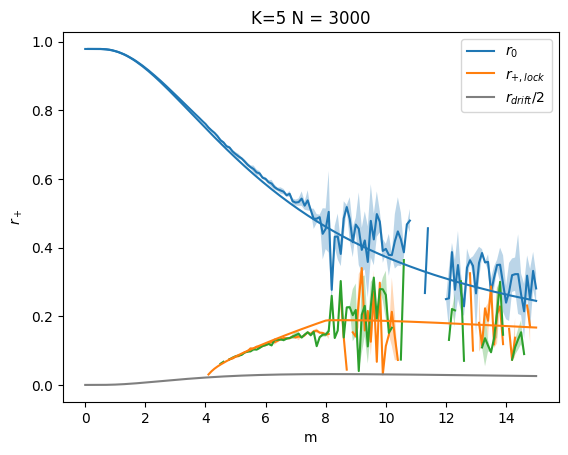

In [13]:
plt.plot(ms,R0_m)
plt.fill_between(ms,R0_m-R0_std,R0_m + R0_std,alpha=0.3)
plt.plot(ms,RP_m)
plt.fill_between(ms,RP_m-RP_std,RP_m + RP_std,alpha=0.3)
plt.plot(ms,RM_m)
plt.fill_between(ms,RM_m-RM_std,RM_m + RM_std,alpha=0.3)


plt.plot(df_K['r0_u'],color ='tab:blue',label='$r_0$',zorder=10)
plt.plot(df_K['r+_ul'],color ='tab:orange',label='$r_{+,lock}$',zorder=10)
plt.plot(df_K['r+_drift'],color ='tab:grey',label='$r_{drift}/2$',zorder=10)
ms_ = df_K.index.to_numpy(float)
rstd = OSP.get_rstd(df_K['r0_u'].to_numpy(float),df_K['r+_ul'].to_numpy(float),5,ms_)


plt.legend()
# plt.axvline(Ks_check2[~np.isnan(mu)][0]
plt.title(f'K={K} N = {N}')
plt.xlabel(f'm')
plt.ylabel(f'$r_+$')

plt.legend()